# K-Means Clustering

**_Author: Christos Anagnostopoulos_**

### Visualising crimes in Chicago using clustering

### Importing the data set and exploratory data analysis (EDA)

The data set contains records from 2001 to present day, but with only 65k-66k records compared to the original dataset, which has around 6.6m records. If anyone is interested in analysing the original data set, it can be found [here](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pylab as pl

In [78]:
df=pd.read_csv('Crimes_2001_to_present_sample.csv') #load the database we will use

In [79]:
df.head(10) #explore our data

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4506608,9878952,HX529642,12/04/2014 09:30:00 AM,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,...,4.0,39.0,04B,1183896.0,1874058.0,2014,02/04/2016 06:33:39 AM,41.809597,-87.601016,"(41.809597, -87.601016)"
1,561379,2514319,HH857213,12/24/2002 09:00:00 AM,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,29.0,25.0,14,1139530.0,1897135.0,2002,04/15/2016 08:55:02 AM,41.873845,-87.763183,"(41.873845, -87.763183)"
2,5058884,3891396,HL266026,03/31/2005 11:46:00 AM,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,...,39.0,13.0,15,1152801.0,1933422.0,2005,04/15/2016 08:55:02 AM,41.973168,-87.713495,"(41.973168, -87.713495)"
3,3619502,4983700,HM446634,06/30/2006 04:44:00 PM,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,...,27.0,23.0,26,1153483.0,1905125.0,2006,04/15/2016 08:55:02 AM,41.895505,-87.711742,"(41.895505, -87.711742)"
4,5533749,5284225,HM654977,10/11/2006 11:05:00 PM,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,24.0,25.0,16,1144509.0,1896222.0,2006,04/15/2016 08:55:02 AM,41.871248,-87.744926,"(41.871248, -87.744926)"
5,6162396,2182182,HH429064,06/09/2002 05:00:23 AM,045XX N ASHLAND AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,...,47.0,3.0,18,1164839.0,1930205.0,2002,04/15/2016 08:55:02 AM,41.964093,-87.669321,"(41.964093, -87.669321)"
6,720409,2839797,HJ500224,07/16/2003 05:45:00 PM,016XX N MAPLEWOOD AVE,0620,BURGLARY,UNLAWFUL ENTRY,PARK PROPERTY,False,...,1.0,24.0,05,1159114.0,1910852.0,2003,04/15/2016 08:55:02 AM,41.911107,-87.690903,"(41.911107, -87.690903)"
7,2251410,7313423,HS117845,01/12/2010 10:30:00 PM,015XX S SANGAMON ST,0810,THEFT,OVER $500,STREET,False,...,25.0,28.0,06,1170443.0,1892718.0,2010,02/04/2016 06:33:39 AM,41.861105,-87.649815,"(41.861105, -87.649815)"
8,557591,10374717,HZ110903,12/27/2015 02:13:00 AM,050XX S WASHINGTON PARK CT,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,...,3.0,38.0,26,NaN,NaN,2015,01/15/2016 12:18:25 PM,NaN,NaN,NaN
9,4676604,3339646,HK381485,05/22/2004 07:07:14 PM,001XX N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,...,42.0,32.0,06,1176352.0,1900927.0,2004,04/15/2016 08:55:02 AM,41.883500,-87.627877,"(41.8835, -87.627877)"


### Data preprocessing

In [80]:
# Droping columns that are irrevelenant 
df.drop(columns=["X Coordinate","Y Coordinate","Updated On","Location","Beat"] )

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude
0,4506608,9878952,HX529642,12/04/2014 09:30:00 AM,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,True,2.0,4.0,39.0,04B,2014,41.809597,-87.601016
1,561379,2514319,HH857213,12/24/2002 09:00:00 AM,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,True,15.0,29.0,25.0,14,2002,41.873845,-87.763183
2,5058884,3891396,HL266026,03/31/2005 11:46:00 AM,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,False,17.0,39.0,13.0,15,2005,41.973168,-87.713495
3,3619502,4983700,HM446634,06/30/2006 04:44:00 PM,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,False,11.0,27.0,23.0,26,2006,41.895505,-87.711742
4,5533749,5284225,HM654977,10/11/2006 11:05:00 PM,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,11.0,24.0,25.0,16,2006,41.871248,-87.744926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62828,2329738,7370796,HS173036,02/20/2010 06:06:00 AM,008XX W NORTH AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,18.0,43.0,8.0,15,2010,41.910888,-87.650199
62829,6105927,1953820,HH142713,01/23/2002 04:15:00 AM,0000X W 68 ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE-GARAGE,False,False,7.0,NaN,NaN,14,2002,41.770914,-87.627048
62830,4691982,3360661,HK392170,05/27/2004 05:55:25 PM,076XX S CICERO AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,8.0,13.0,65.0,06,2004,41.754593,-87.741529
62831,2124391,7133885,HR542961,09/18/2009 12:01:00 AM,034XX W IRVING PARK RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,17.0,35.0,16.0,07,2009,41.953833,-87.714664


It may be useful for our analysis to know the date and the time when a certain crime happened. All this information is enclosed in the column `Date`. However, if you run the cell below, you may observe that the entries in `Date` are of type "object" instead of a date-specific object like `Timestamp`.

In [81]:
print(df.Date.dtype) #Data type of "Date" column ( If type # datetime64 we will need to convert using pd.to_datetime function)

object


In [82]:
df["Date"] = pd.to_datetime(df["Date"])


In [83]:
df['date'] = [d.date() for d in df['Date']] #create new column "date" for the dates

In [84]:
df['time'] = [t.time() for t in df["Date"]] #create new column "time" for time

In [85]:
df.head()
#visualising new dataframe

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,time
0,4506608,9878952,HX529642,2014-12-04 09:30:00,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,...,04B,1183896.0,1874058.0,2014,02/04/2016 06:33:39 AM,41.809597,-87.601016,"(41.809597, -87.601016)",2014-12-04,09:30:00
1,561379,2514319,HH857213,2002-12-24 09:00:00,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,14,1139530.0,1897135.0,2002,04/15/2016 08:55:02 AM,41.873845,-87.763183,"(41.873845, -87.763183)",2002-12-24,09:00:00
2,5058884,3891396,HL266026,2005-03-31 11:46:00,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,...,15,1152801.0,1933422.0,2005,04/15/2016 08:55:02 AM,41.973168,-87.713495,"(41.973168, -87.713495)",2005-03-31,11:46:00
3,3619502,4983700,HM446634,2006-06-30 16:44:00,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,...,26,1153483.0,1905125.0,2006,04/15/2016 08:55:02 AM,41.895505,-87.711742,"(41.895505, -87.711742)",2006-06-30,16:44:00
4,5533749,5284225,HM654977,2006-10-11 23:05:00,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,16,1144509.0,1896222.0,2006,04/15/2016 08:55:02 AM,41.871248,-87.744926,"(41.871248, -87.744926)",2006-10-11,23:05:00


### Identify the areas in the city that experience more criminal activity

To identify which portions of the city experience criminal attacks of which type, it is be useful to  cluster the data according to the `District`, `Ward` and `IUCR`. IUCR codes are four digit codes that law enforcement agencies use to classify criminal incidents when taking individual reports.

In [86]:
sub_df = df[["District", "Ward", "IUCR"]] #selecting our columns of interest

In [87]:
sub_df #visualising new dataframe

,District,Ward,IUCR
0,2.0,4.0,0497
1,15.0,29.0,1320
2,17.0,39.0,141C
3,11.0,27.0,2092
4,11.0,24.0,1506
...,...,...,...
62828,18.0,43.0,143A
62829,7.0,NaN,1310
62830,8.0,13.0,0860
62831,17.0,35.0,0910


In [72]:
print(sub_df.isnull().sum())  #total of NaN values per column

District    0
Ward        0
IUCR        0
dtype: int64


In [88]:
sub_df["Ward"].fillna(sub_df["Ward"].mode()[0], inplace=True)
#Alternatively : sub_df = sub_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [89]:
print(sub_df.isnull().sum())# New total of NaN values per column

District    0
Ward        0
IUCR        0
dtype: int64


In [90]:
sub_df

,District,Ward,IUCR
0,2.0,4.0,0497
1,15.0,29.0,1320
2,17.0,39.0,141C
3,11.0,27.0,2092
4,11.0,24.0,1506
...,...,...,...
62828,18.0,43.0,143A
62829,7.0,28.0,1310
62830,8.0,13.0,0860
62831,17.0,35.0,0910


Finally, before moving on to clustering, we will extract the numeric values in the column `IUCR` and visualise our new dataframe.

Run the code cell below.

In [91]:
sub_df = sub_df.assign(IUCR = sub_df.IUCR.str.extract('(\d+)', expand=True).astype(int))
sub_df.info()     #Extracting numeric values from IUCR 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62833 entries, 0 to 62832
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   District  62833 non-null  float64
 1   Ward      62833 non-null  float64
 2   IUCR      62833 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.4 MB


### Clustering without normalisation

In [92]:
from sklearn.cluster import KMeans

In [93]:
N = range(1, 20)
kmeans = []
for i in N:
    kmeans.append(KMeans(i))        #compute the values for each number of clusters




In [94]:
score = []
for i in range(len(kmeans)):
    score.append(kmeans[i].fit(sub_df).score(sub_df))  #compute for score values for each kmeans


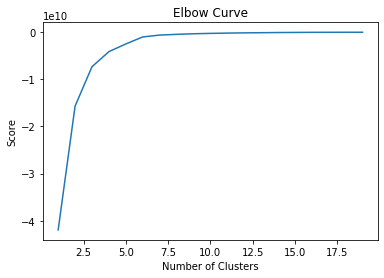

In [95]:
pl.plot(N,score)  #plotting the number of clusters - score , in order to apply the "elbow" rule
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show() 

Without normalising the data, the best number of clusters is around 4, so let's try that out!

Complete the code cell below by following these steps:
- Use `KMeans()` to compute the optimal K-mean `km` by choosing the optimal number of clusters.
- Use `.fit()` to compute K-means clustering.
- Use the `km` attribute `predict()` on `sub_df` to predict the closest cluster each sample belongs to.

You can find the documentation about these functions [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [96]:
km = KMeans(n_clusters=4) #from elbow curve, optimal number of cluster around 4
km.fit(sub_df) #fitting on sub_df dataframe
y = km.predict(sub_df) #predicting on sub_df dataframe


In [97]:
sub_df['Cluster'] = y #Adding a column with the cluster predictions
sub_df

,District,Ward,IUCR,Cluster
0,2.0,4.0,497,0
1,15.0,29.0,1320,3
2,17.0,39.0,141,0
3,11.0,27.0,2092,1
4,11.0,24.0,1506,3
...,...,...,...,...
62828,18.0,43.0,143,0
62829,7.0,28.0,1310,3
62830,8.0,13.0,860,3
62831,17.0,35.0,910,3


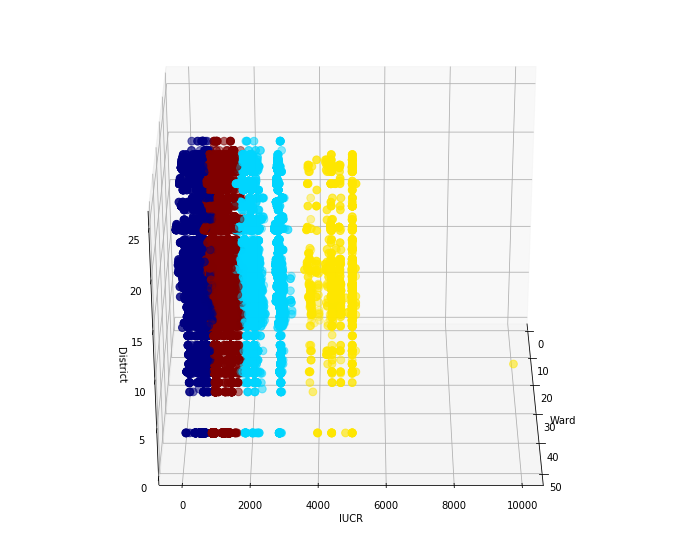

In [98]:
fig = plt.figure(figsize=(12,10)) #visualising the cluster without normalisation
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_df['Ward'])
y = np.array(sub_df['IUCR'])
z = np.array(sub_df['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_df["Cluster"], s=60, cmap="jet")
ax.view_init(azim=0)
plt.show()

### Clustering with normalisation


In [99]:
sub_df['IUCR'] = (sub_df['IUCR'] - sub_df['IUCR'].min())/(sub_df['IUCR'].max()-sub_df['IUCR'].min()) #min-max normalisation on "IUCR"

In [100]:
print(sub_df["IUCR"])

0        0.047214
1        0.130598
2        0.011145
3        0.208815
4        0.149443
           ...   
62828    0.011348
62829    0.129585
62830    0.083992
62831    0.089058
62832    0.083992
Name: IUCR, Length: 62833, dtype: float64


Complete the code cell below to normalise the columns `Ward` and `District` following the example given above.

In [101]:
sub_df['Ward'] = (sub_df['Ward'] - sub_df['Ward'].min())/(sub_df['Ward'].max()- sub_df['Ward'].min()) #min-max normalisation on rest of columns
sub_df['District'] = (sub_df['District'] - sub_df['District'].min())/(sub_df['District'].max()-sub_df['District'].min())

In [41]:
sub_df

,District,Ward,IUCR,Cluster
0,0.041667,0.061224,0.047214,0
1,0.583333,0.571429,0.130598,3
2,0.666667,0.775510,0.011145,0
3,0.416667,0.530612,0.208815,1
4,0.416667,0.469388,0.149443,3
...,...,...,...,...
62828,0.708333,0.857143,0.011348,0
62829,0.250000,0.551020,0.129585,3
62830,0.291667,0.244898,0.083992,3
62831,0.666667,0.693878,0.089058,3


In [102]:
N = range(1, 20)
kmeans = []
for i in N:
    kmeans.append(KMeans(i)) #compute the values for each number of clusters


score_norm = []
for i in range(len(kmeans)):
     score_norm.append(kmeans[i].fit(sub_df).score(sub_df))   #compute updated score


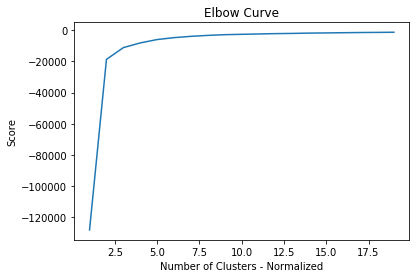

In [103]:
pl.plot(N,score_norm)  #plotting the normalised "elbow" curve
pl.xlabel('Number of Clusters - Normalized')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show() 

In [104]:
km = KMeans(n_clusters=2)  #optimal number of clusters with normalised data is 2 
km.fit(sub_df)
y = km.predict(sub_df)

In [105]:
sub_df["NormalisedCluster"] = y
sub_df


,District,Ward,IUCR,Cluster,NormalisedCluster
0,0.041667,0.061224,0.047214,0,1
1,0.583333,0.571429,0.130598,3,0
2,0.666667,0.775510,0.011145,0,1
3,0.416667,0.530612,0.208815,1,1
4,0.416667,0.469388,0.149443,3,0
...,...,...,...,...,...
62828,0.708333,0.857143,0.011348,0,1
62829,0.250000,0.551020,0.129585,3,0
62830,0.291667,0.244898,0.083992,3,0
62831,0.666667,0.693878,0.089058,3,0


We can see that we get very different cluster prediction when we have normalised our data instead of not.

![](cluster_norm.png)
